<a href="https://colab.research.google.com/github/JoelPMathew/Wine_quality_ML/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================
# 1. Imports & Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report

# Pretty plots
sns.set(style="whitegrid")


In [ ]:
# ==============================
# 2. Load Dataset
# ==============================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

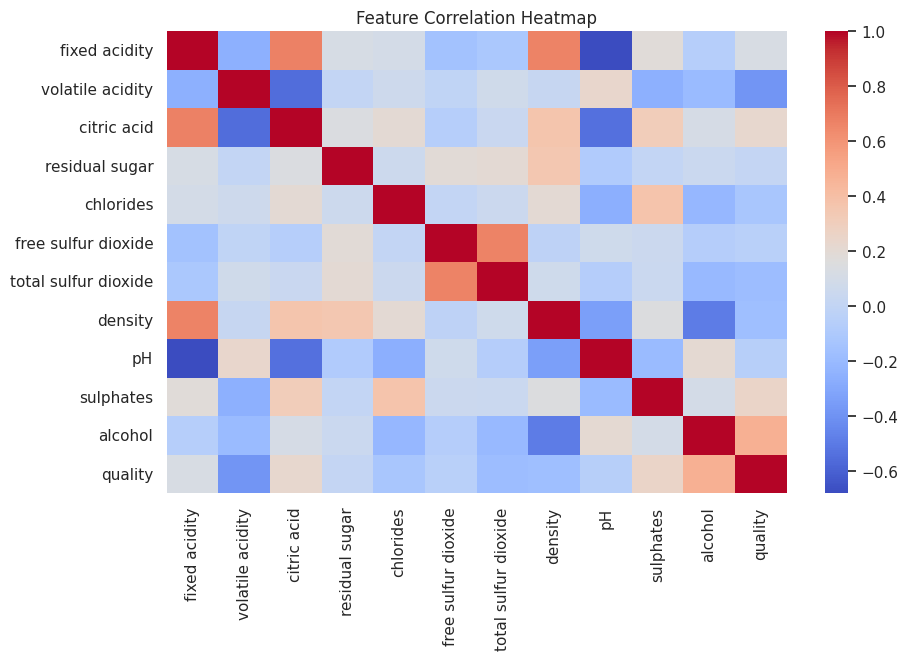

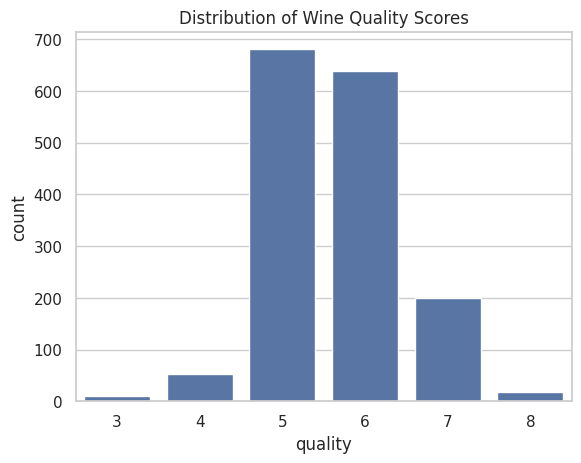

In [ ]:
# ==============================
# 3. EDA
# ==============================
print(df.info())
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of target
sns.countplot(x="quality", data=df)
plt.title("Distribution of Wine Quality Scores")
plt.show()


In [ ]:
# ==============================
# 4. Feature Engineering
# ==============================
# Binary label: Good (>=6) vs Bad (<6)
df["label"] = (df["quality"] >= 6).astype(int)

X = df.drop(["quality", "label"], axis=1)
y_reg = df["quality"]   # regression target
y_clf = df["label"]     # classification target

# Train-test split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ==============================
# 5. Regression (Linear)
# ==============================
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print(f"Linear Regression MAE: {mae:.3f}")


Linear Regression MAE: 0.504


Logistic Regression Accuracy: 0.741
Decision Tree Accuracy: 0.716
Random Forest Accuracy: 0.787


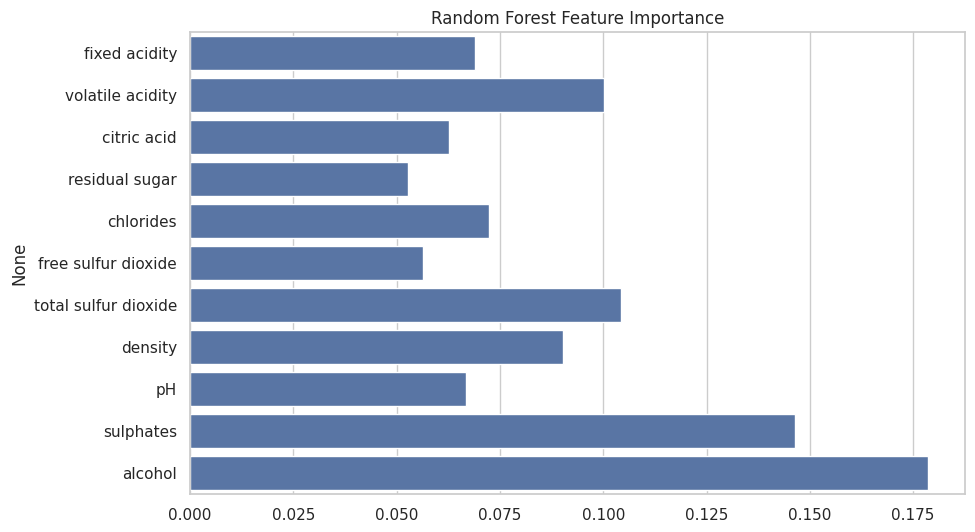

SVM Accuracy: 0.772


In [ ]:
# ==============================
# 6. Classification (Logistic, Tree, RF, SVM)
# ==============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_clf)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_clf, preds)
    print(f"{name} Accuracy: {acc:.3f}")

    if name == "Random Forest":
        # Feature importance plot
        importances = model.feature_importances_
        plt.figure(figsize=(10,6))
        sns.barplot(x=importances, y=X.columns)
        plt.title("Random Forest Feature Importance")
        plt.show()


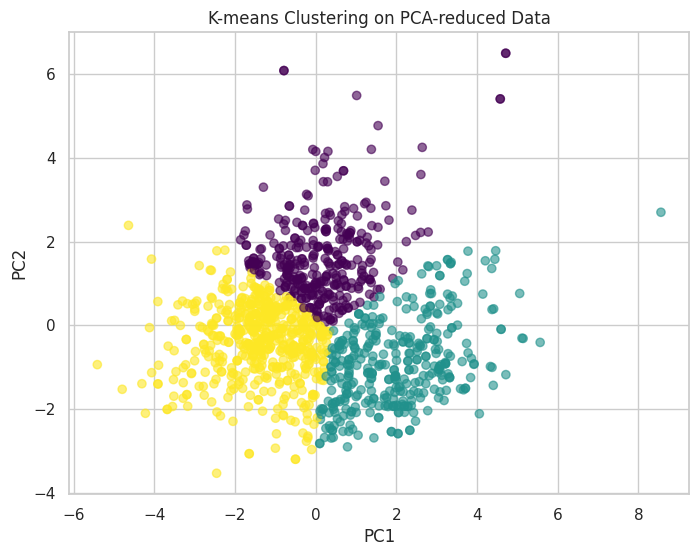

In [ ]:
# ==============================
# 7. Clustering (K-means + PCA for 2D visualization)
# ==============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("K-means Clustering on PCA-reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       141
           1       0.82      0.79      0.81       179

    accuracy                           0.79       320
   macro avg       0.78      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



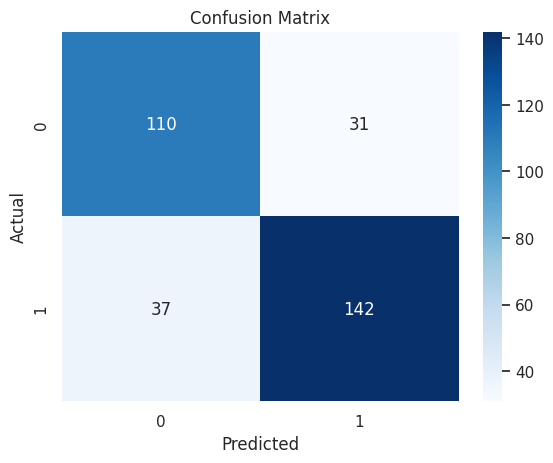

In [ ]:
# ==============================
# 8. Evaluation & Reports
# ==============================
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train_clf)
preds = best_model.predict(X_test_scaled)

print("Classification Report (Random Forest):")
print(classification_report(y_test_clf, preds))

cm = confusion_matrix(y_test_clf, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
